<h2 style = "background-color:SandyBrown; border: 1px solid black; text-align: center; "> 
    <br>In this notebook I will focus on movies Genres as an independant variables  <br>
    

<ul style = "background-color:pink; border: 1px solid black; font-size:150%;"> 
    <li> EDA for the Genres (Independant Varaible)
     <li> Clustring and building a recommended movies based on Genres

In [1]:
#import the basic liberaries for EDA
import numpy as np
import pandas as pd
import ast
from collections import Counter

#Plotting liberaries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import missingno as msno #https://github.com/ResidentMario/missingno

# upsupervised liberaries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#read the df
df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
#print sample of the Data frame
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


<h2 style = "background-color:gray; border: 1px solid black; text-align: center; "> 
    <br>Let's check the missing value using missingno liberary<br>
    

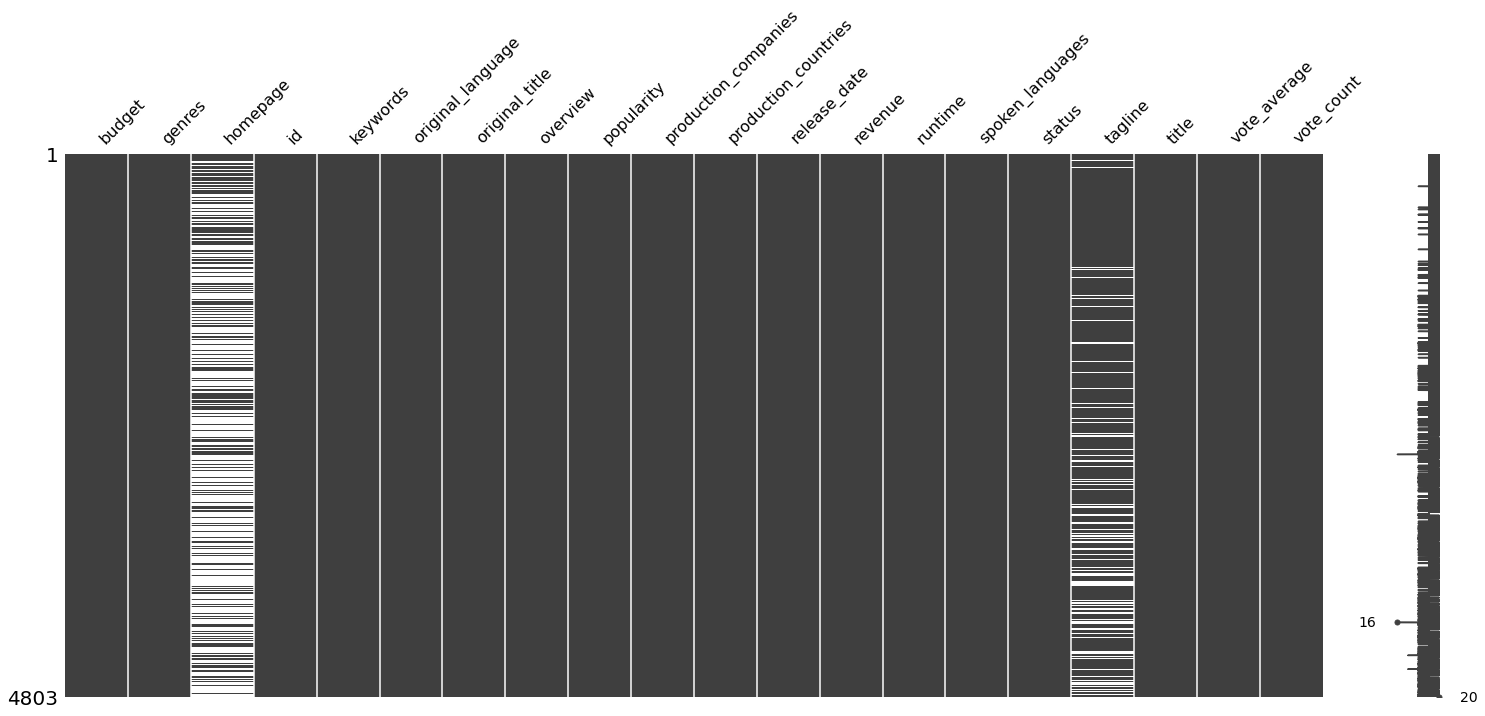

In [2]:
msno.matrix(df); #quickly visually pick out patterns in data completion.

### The missing values in the home page and tagline will not effect my analysis 

<h2 style = "background-color:powderblue; border: 1px solid black; text-align: center; "> 
    <br>First: let's handel the pandas columns contain list[  ] of dicts{ } <br>
    


## Print sample of Genres columns 

In [3]:
print ('Sample of Geners Column\n'  , df.genres[0])
print ("_"*40)

Sample of Geners Column
 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
________________________________________


## Create the Conversion function

In [4]:
# Cridet for this function goes to this notebook
# https://www.kaggle.com/yashsaxena17/movie-recommendation
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

## Print the Final output

In [5]:
df['genres'] = df['genres'].apply(convert)
print ('Sample of Geners Column\n'  , df.genres[0])
print ("_"*40)

Sample of Geners Column
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
________________________________________


<h2 style = "background-color:powderblue; border: 1px solid black; text-align: center; "> 
    <br>Generate a new Data frame <br> <br>Independant Variable : Genres.<br>

## Get the frequency in Counter() and convert it to dataframe

In [6]:
geners = Counter()
for i in range(df.shape[0]):
    for j in df.genres[i]:
        geners[j]+=1
Geners_df = pd.DataFrame.from_dict(geners, orient='index').reset_index()
Geners_df = Geners_df.rename(columns = {'index': 'Geners' ,0: 'Frequency'})
Geners_df.head(10)

,Geners,Frequency
0,Action,1154
1,Adventure,790
2,Fantasy,424
3,Science Fiction,535
4,Crime,696
5,Drama,2297
6,Thriller,1274
7,Animation,234
8,Family,513
9,Western,82


## Map the the dependant variables average of: <br><br>(vote_count , vote_average , Popularity , budget , revenue ) <br><br>from the Original df to the genres df

In [7]:
generes_list = Geners_df.Geners.tolist()

Geners_Vote_Average = {}
Geners_Vote_Count = {}
Geners_Popularity = {}
Geners_budget = {}
Geners_revenue = {}



for j in generes_list:
    gener = []
    for i in range (df.shape[0]):
        if j in  df.genres[i]:
            gener.append(df.vote_average[i])
            Geners_Vote_Average[j] = sum(gener)/len(gener)
            
for j in generes_list:
    gener = []
    for i in range (df.shape[0]):
        if j in  df.genres[i]:
            gener.append(df.vote_count[i])
            Geners_Vote_Count[j] = sum(gener)/len(gener)
            
for j in generes_list:
    gener = []
    for i in range (df.shape[0]):
        if j in  df.genres[i]:
            gener.append(df.popularity[i])
            Geners_Popularity[j] = sum(gener)/len(gener)

for j in generes_list:
    gener = []
    for i in range (df.shape[0]):
        if j in  df.genres[i]:
            gener.append(df.budget[i])
            Geners_budget[j] = sum(gener)/len(gener)

            
for j in generes_list:
    gener = []
    for i in range (df.shape[0]):
        if j in  df.genres[i]:
            gener.append(df.revenue[i])
            Geners_revenue[j] = sum(gener)/len(gener)

                                              


                                              
Geners_df['Average_Vote_Average'] = Geners_df.Geners.map(Geners_Vote_Average)
Geners_df['Average_Vote_Count'] = Geners_df.Geners.map(Geners_Vote_Count)
Geners_df['Average_Popularity'] = Geners_df.Geners.map(Geners_Popularity)
Geners_df['Average_budget'] = Geners_df.Geners.map(Geners_budget)
Geners_df['Average_revenue'] = Geners_df.Geners.map(Geners_revenue)
# Round the Budget and revenue to the million
Geners_df['Average_budget'] = Geners_df['Average_budget']/1000000
Geners_df['Average_revenue']  = Geners_df['Average_revenue'] /1000000

In [8]:
Geners_df.style.background_gradient(cmap='YlGnBu')

,Geners,Frequency,Average_Vote_Average,Average_Vote_Count,Average_Popularity,Average_budget,Average_revenue
0,Action,1154,5.989515,1135.814558,30.940382,51.510751,141.213098
1,Adventure,790,6.156962,1430.669620,39.268042,66.326861,208.660204
2,Fantasy,424,6.096698,1323.983491,36.387043,63.560605,193.354245
3,Science Fiction,535,6.005607,1425.585047,36.451806,51.865551,152.456515
4,Crime,696,6.274138,752.599138,22.853274,27.849808,66.150662
5,Drama,2297,6.388594,532.280801,17.764853,20.678325,52.116232
6,Thriller,1274,6.010989,772.845369,24.460077,31.968207,81.044291
7,Animation,234,6.341453,1246.170940,38.813439,66.465902,225.693025
8,Family,513,6.029630,902.290448,27.832849,50.719512,162.345495
9,Western,82,6.178049,607.853659,18.236279,27.078702,46.245965


<h2 style = "background-color:powderblue; border: 1px solid black; text-align: center; "> 
    <br>Let's visualize the final Genres dataframe<br>

Text(5, 200, 'Animation , Adventure\n       Fantasy')

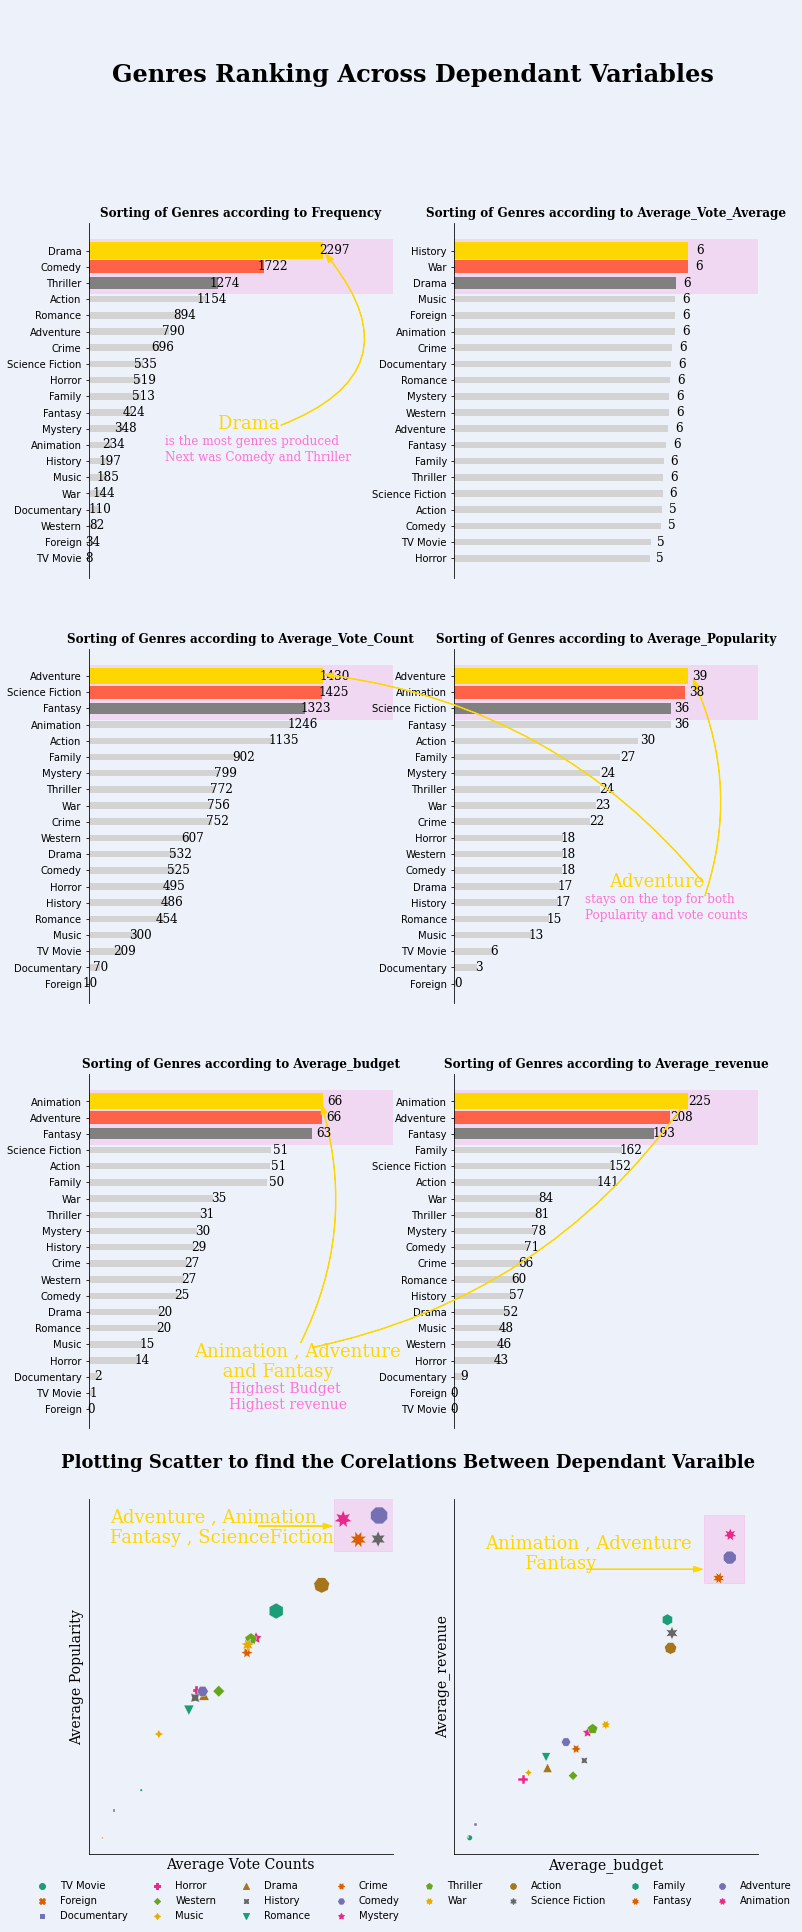

In [9]:
# Create dependant variables list to use it in for loop
dependant_variables = ['Frequency', 'Average_Vote_Average', 'Average_Vote_Count',
                       'Average_Popularity', 'Average_budget', 'Average_revenue']
#Set the size of the horizontal bars
h = np.array([0.4,0.4 ,0.4 ,0.4 ,0.4 ,0.4,0.4 ,0.4,
             0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.7,0.8,1])
#Set the Colors of the bars
c = np.array(['lightgray','lightgray' ,'lightgray' ,'lightgray' ,'lightgray' ,'lightgray',
              'lightgray' ,'lightgray',
             'lightgray','lightgray','lightgray'
              ,'lightgray','lightgray','lightgray','lightgray',
              'lightgray','lightgray','gray','tomato','gold'])
#Create the figure and the axis 
fig , ax = plt.subplots(nrows = 4, ncols = 2 , figsize = [12,30])
#set the figure background color
fig.patch.set_facecolor('#edf2fa')
#Figure Title
fig.suptitle('\n\nGenres Ranking Across Dependant Variables', fontfamily='serif',
                   fontsize = 24 , fontweight='bold' )
#for loop (axis and variable ) to generate the barh plot 
for axes , variable in zip (ax.flatten() , dependant_variables):
    #Sorting the Genres dataframe by virables
    Geners_df = Geners_df.sort_values(by = variable )
    #Barh plot using Matplotlib
    axes.barh(Geners_df.Geners ,Geners_df[variable] , height = h  , color = c)
    #set the axes background color
    axes.set_facecolor('#edf2fa')
    #set the x limit
    mx = Geners_df[variable].max()*1.3
    axes.set_xlim(0 , mx)
    #Create a background diffrent color for the top three Genres
    axes.axhspan(ymin = 16.3 , ymax = 19.7 , fc='#ff73d5', alpha=0.2 , zorder=0)
    #remove the Axes Boundary except the Left side
    for s in ['top', 'right', 'bottom']:
         axes.spines[s].set_visible(False)
    #add the notation on the bars
    for patch in axes.patches:
        try:
            #try exepct technique was used becouse the axhspan has no attrebuite get_width nor get_height
            bl = patch.get_xy()
            x = 1.05 * patch.get_width() + bl[0]
            y = 0.5 * patch.get_height() + bl[1] 
            axes.text(x,y,"%d" %(patch.get_width()),va='center',ha='center' , 
                      color = 'black',fontsize = 12, fontfamily='serif')
        except:
            #skip and go to next patch
            continue
    #Get it more clean and remove the useless ticks and labels
    axes.set_xticks([])
    axes.set_xlabel("")
    axes.set_ylabel("")
    axes.set_title(f"Sorting of Genres according to {variable}" , fontfamily='serif',
                   fontsize = 12 , fontweight='bold')
    #End of for loop
    

#Add some text on the visualization 
ax[0,0].text(1270, 8, 'Drama ', fontsize=18, fontfamily='serif', color = 'Gold')
ax[0,0].text(750, 7, 'is the most genres produced ', fontsize=12, fontfamily='serif', color = '#ff73d5')
ax[0,0].text(750, 6, 'Next was Comedy and Thriller', fontsize=12,  fontfamily='serif', color = '#ff73d5');


ax[1,1].text(26, 6, 'Adventure',  fontsize=18,   fontfamily='serif', color = 'Gold')
ax[1,1].text(22, 5,  'stays on the top for both ', fontsize=12,  fontfamily='serif', color = '#ff73d5')
ax[1,1].text(22, 4, 'Popularity and vote counts', fontsize=12,  fontfamily='serif', color = '#ff73d5');


ax[2,0].text(30, 2,  'Animation , Adventure\n     and Fantasy', fontsize=18,  fontfamily='serif', color = 'Gold')
ax[2,0].text(40, 0,  'Highest Budget \nHighest revenue ', fontsize=14,  fontfamily='serif', color = '#ff73d5');

#lets add some arrows
#https://stackoverflow.com/questions/44526103/matplotlib-draw-curved-arrow-that-looks-just-like-pyplot-arrow
style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
a = patches.FancyArrowPatch((1870, 8.17), (2310, 18.9),connectionstyle="arc3,rad=.7", **kw)
ax[0,0].add_patch(a)
a2 = patches.FancyArrowPatch((42, 5.30), (40, 18.9),connectionstyle="arc3,rad=.2", **kw)
ax[1,1].add_patch(a2)
a3 = patches.FancyArrowPatch((60 , 4), (66, 18.9),connectionstyle="arc3,rad=.2", **kw)
ax[2,0].add_patch(a3)

# Create the arrow across two supblots
#https://www.cilyan.org/blog/2016/01/23/matplotlib-draw-between-subplots/
# 1. Get transformation operators for axis and figure
ax0tr = ax[1,0].transData # Axis 0 -> Display
ax1tr = ax[1,1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptE = figtr.transform(ax0tr.transform((1430, 0.047)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptB = figtr.transform(ax1tr.transform((42, -0.018)))
# Place arrow in figure coord system
arrow = patches.FancyArrowPatch(ptB, ptE, transform=fig.transFigure, connectionstyle="arc3,rad=0.2" , **kw)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)


# 1. Get transformation operators for axis and figure
ax0tr = ax[2,0].transData # Axis 0 -> Display
ax1tr = ax[2,1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((63, -.03)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((227, 0.048)))
# Place arrow in figure coord system
arrow2 = patches.FancyArrowPatch(ptB, ptE, transform=fig.transFigure, connectionstyle="arc3,rad=0.2" , **kw)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow2)

# adding the scatter Plots

sns.scatterplot(x = Geners_df.Average_Vote_Count , y = Geners_df.Average_Popularity  , 
           s = Geners_df.Average_budget*5 , hue =Geners_df.Geners , ax = ax[3,0] ,
                style=Geners_df.Geners , legend = False , palette="Dark2")
ax[3,0].set_facecolor('#edf2fa')
for s in ['top', 'right']:
    ax[3,0].spines[s].set_visible(False)
ax[3,0].set_xticks([])
ax[3,0].set_yticks([])
ax[3,0].set_xlabel("Average Vote Counts" ,fontsize=14,   fontfamily='serif')
ax[3,0].set_ylabel("Average Popularity" , fontsize=14,   fontfamily='serif')
ax[3,0].text( -200,45 ,"Plotting Scatter to find the Corelations Between Dependant Varaible" , fontfamily='serif',
                   fontsize = 18 , fontweight='bold')
    
    
    
sns.scatterplot(x = Geners_df.Average_budget , y = Geners_df.Average_revenue  , 
           s = Geners_df.Average_Popularity*5 , hue =Geners_df.Geners , ax = ax[3,1] ,
                style=Geners_df.Geners , legend = "full" , palette="Dark2")
plt.legend(bbox_to_anchor=(-1.40, -.20), loc="lower left", borderaxespad=0. , ncol=8 , 
          facecolor='#edf2fa' , framealpha=.01)
ax[3,1].set_facecolor('#edf2fa')

for s in ['top', 'right']:
    ax[3,1].spines[s].set_visible(False)
ax[3,1].set_xticks([])
ax[3,1].set_yticks([])
ax[3,1].set_xlabel("Average_budget" ,fontsize=14,   fontfamily='serif')
ax[3,1].set_ylabel("Average_revenue" , fontsize=14,   fontfamily='serif');


ax[3,0].add_patch(plt.Rectangle((1200, 35), 600 , 50, color='#ff73d5', alpha=0.2 , zorder = 0))


style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
ax[3,0].add_patch(patches.FancyArrowPatch((800, 38), (1200, 38) , **kw))
ax[3,0].text(50, 36,  'Adventure , Animation\nFantasy , ScienceFiction', fontsize=18,  fontfamily='serif', color = 'Gold')
                  

    
    
    
    
ax[3,1].add_patch(plt.Rectangle((60, 190),10 , 50, color='#ff73d5', alpha=0.2 , zorder = 0))


style = "Simple, tail_width=0.5, head_width=6, head_length=9"
kw = dict(arrowstyle=style, color="Gold")
ax[3,1].add_patch(patches.FancyArrowPatch((30, 200), (60, 200) , **kw))
ax[3,1].text(5, 200,  'Animation , Adventure\n       Fantasy', fontsize=18,  fontfamily='serif', color = 'Gold')
  
    
    
    
##https://matplotlib.org/stable/gallery/subplots_axes_and_figures/demo_constrained_layout.html
## To Be Continue


<h2 style = "background-color:powderblue; border: 1px solid black; text-align: center; "> 
    <br>Conclusion of Genres Analysis<br>

<strong><ul style = "background-color:tomato; border: 1px solid black; "> 
    <li> Most produced genres in the list : [Drama / Comedy]
        <li> Most Vote counts goes to : [Adventure /Science Fiction]
            <li> Highest popularity : [Adventure / Animation]
                <li> Highest Budget : [Animation / Advenure]
                    <li> Highest Revenue : [Animation / Advenure]

<h2 style = "background-color:powderblue; border: 1px solid black; text-align: center; "> 
    <br>Unsupervised Task - Clustring movies based on the Genres only <br><br>
    Building a recommended system based on Genres<br><br>

In [10]:
#Building new data frame
geners_list = Geners_df.Geners.tolist()
df_new = df[['original_title' , 'genres' , 'popularity']]
df_new[geners_list] =0 

In [11]:
#Get dummies for the genres
for i in range (df_new.shape[0]):
    for j in  geners_list:
        if j in df.genres[i]:
            df_new[j] [i] = 1

In [12]:
#decomposing the features in 2d
X = df_new.iloc[: , 3:].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [13]:
#clustring using Kmean  - sklearn
model = KMeans(n_clusters=150)
model.fit(principalComponents)

labels = model.labels_

df_new['label'] = pd.DataFrame({'label':labels})

In [14]:
#Build the Recommendation Function
def recommend_10 (film ):
    global df_new
    df_new = df_new.sort_values(by = 'popularity' , ascending = False)
    mark = df_new.loc[df_new['original_title'] == film, 'label'].iloc[0]
    print ("Label number : "  , mark)
    print ("_"*40)
    print ("\nRecommended movies for {} : ".format(film))
    print ("_"*40)
    lst = df_new[df_new.label == mark]['original_title'][0:10].tolist()
    for n , l in zip (range (1,11) , lst):
        print ( n , " : " , l)

In [15]:
recommend_10 ('Mission: Impossible III' )

Label number :  9
________________________________________

Recommended movies for Mission: Impossible III : 
________________________________________
1  :  Mission: Impossible - Rogue Nation
2  :  Skyfall
3  :  Casino Royale
4  :  Mission: Impossible - Ghost Protocol
5  :  The Expendables
6  :  Mission: Impossible
7  :  Mission: Impossible III
8  :  First Blood
9  :  The Expendables 3
10  :  4: Rise of the Silver Surfer


In [16]:
recommend_10 ('Minions' )

Label number :  20
________________________________________

Recommended movies for Minions : 
________________________________________
1  :  Minions
2  :  Night at the Museum: Secret of the Tomb
3  :  Ice Age
4  :  Up
5  :  A Bug's Life
6  :  Ice Age: The Meltdown
7  :  Kung Fu Panda
8  :  Penguins of Madagascar
9  :  Cars
10  :  Ice Age: Dawn of the Dinosaurs


In [17]:
recommend_10 ('The Lord of the Rings: The Fellowship of the Ring' )

Label number :  47
________________________________________

Recommended movies for The Lord of the Rings: The Fellowship of the Ring : 
________________________________________
1  :  Pirates of the Caribbean: The Curse of the Black Pearl
2  :  Batman v Superman: Dawn of Justice
3  :  Pirates of the Caribbean: Dead Man's Chest
4  :  Pirates of the Caribbean: At World's End
5  :  The Lord of the Rings: The Fellowship of the Ring
6  :  Pirates of the Caribbean: On Stranger Tides
7  :  The Lord of the Rings: The Return of the King
8  :  The Hobbit: The Battle of the Five Armies
9  :  Spider-Man 3
10  :  The Hobbit: An Unexpected Journey


In [18]:
recommend_10 ('Titanic' )

Label number :  143
________________________________________

Recommended movies for Titanic : 
________________________________________
1  :  Titanic
2  :  Fifty Shades of Grey
3  :  Cruel Intentions
4  :  The Phantom of the Opera
5  :  Fatal Attraction
6  :  Flammen & Citronen
7  :  Angel Eyes
8  :  The Red Violin
9  :  O
10  :  My Summer of Love


In [19]:
recommend_10 ('Despicable Me' )

Label number :  24
________________________________________

Recommended movies for Despicable Me : 
________________________________________
1  :  Despicable Me
2  :  Monsters University
3  :  Finding Nemo
4  :  WALL·E
5  :  Lilo & Stitch
6  :  Kung Fu Panda 2
7  :  Coraline
8  :  Tangled
9  :  Madagascar
10  :  Pinocchio


<h2 style = "background-color:Tan; border: 1px solid black; text-align: center; "> 
    <br>Thank you for visiting my notebook<br>